In [1]:
import os
import tarfile
from six.moves import urllib

down_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.path.join("datasets", "housing")
housing_url = down_root + housing_path + '/housing.tgz'

def fetch_housing_data(housing_url=housing_url, housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
def load_housing_data(housing_path=housing_path):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#null값 제거됨
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
hist

import os
import tarfile
from six.moves import urllib

down_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.path.join("datasets", "housing")
housing_url = down_root + housing_path + '/housing.tgz'

def fetch_housing_data(housing_url=housing_url, housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
import pandas as pd
def load_housing_data(housing_path=housing_path):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()
housing.info()
housing["ocean_proximity"].value_counts()
#null값 제거됨
housing.describe()
hist


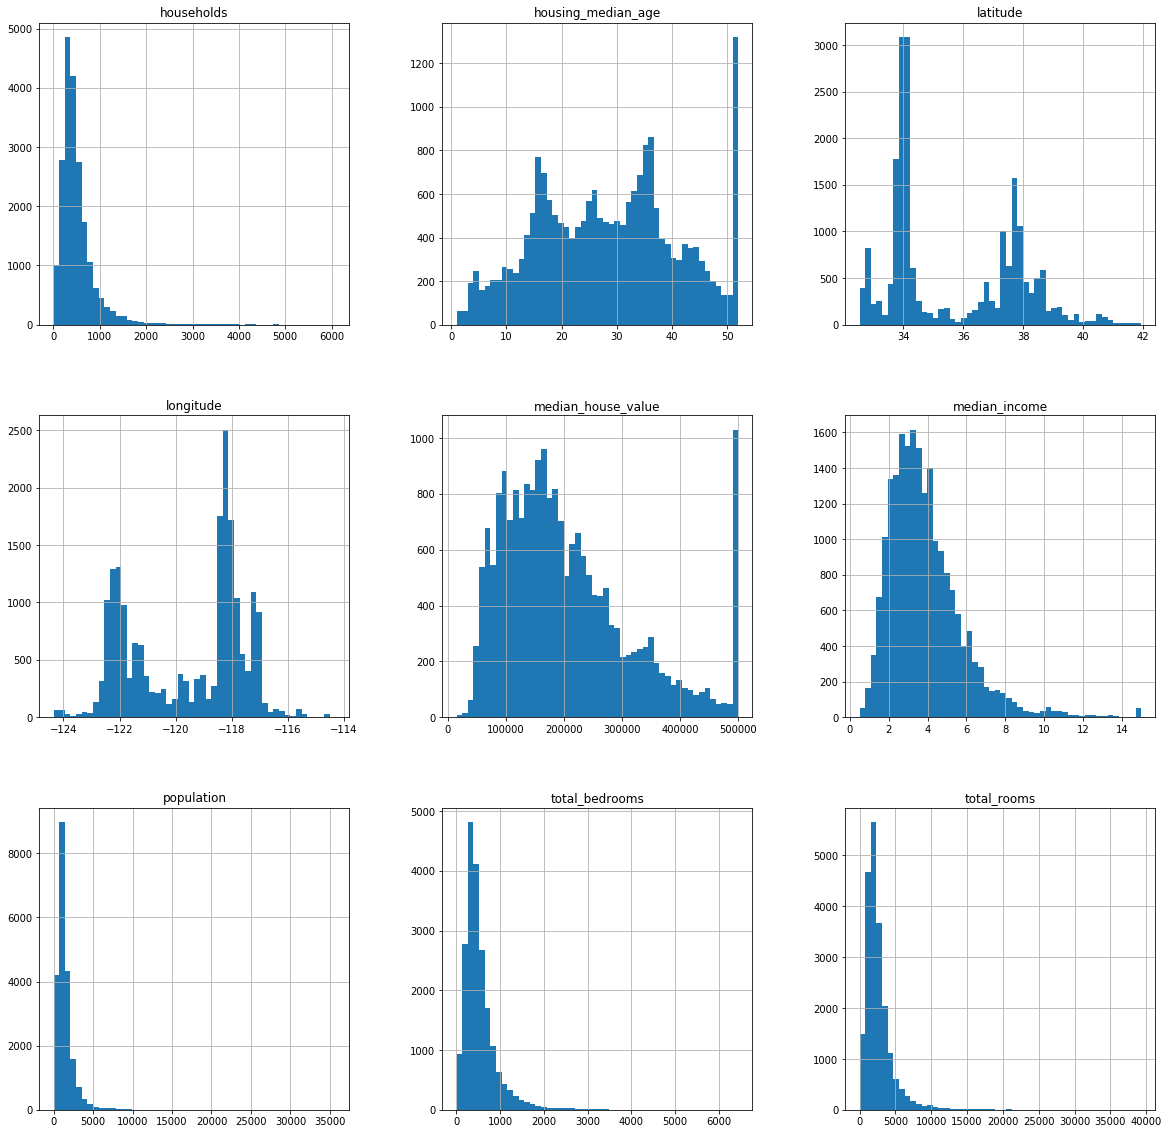

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,20))
plt.show()

In [10]:
import numpy as np

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

In [13]:
print(len(train_set), 'train +', len(test_set), 'test')

16512 train + 4128 test


In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio *2*32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [16]:
housing_with_id["id"] = housing["longitude"]*1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing, 0.2, "id")

KeyError: 'id'

In [66]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

순수한 무작위 샘플링  
샘플링 편향이 생길 가능성 유의 - 계층적 샘플링을 통해 데이터의 대표성을 확보

In [67]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) #why 1.5
housing["income_cat"].where(housing['income_cat'] < 5, 5.0, inplace=True )

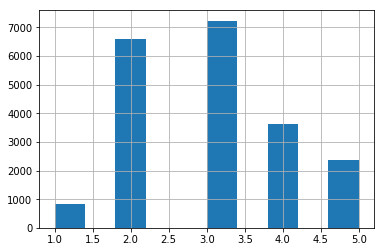

In [68]:
housing['income_cat'].hist()

income 카테고리 기반으로 계층 샘플링

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

In [70]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [71]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [72]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## EDA

복사본 만들기

In [73]:
housing = strat_train_set.copy()

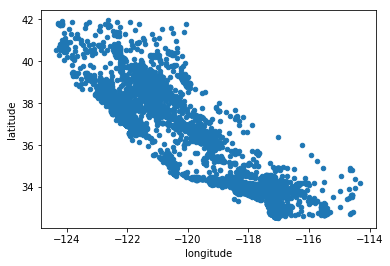

In [74]:
housing.plot(kind='scatter', x='longitude', y='latitude')

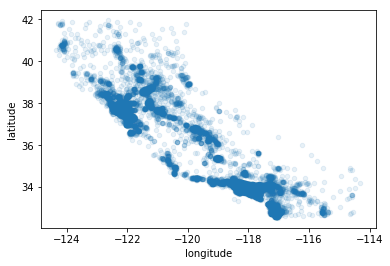

In [75]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1) #몰려있는 곳 확인

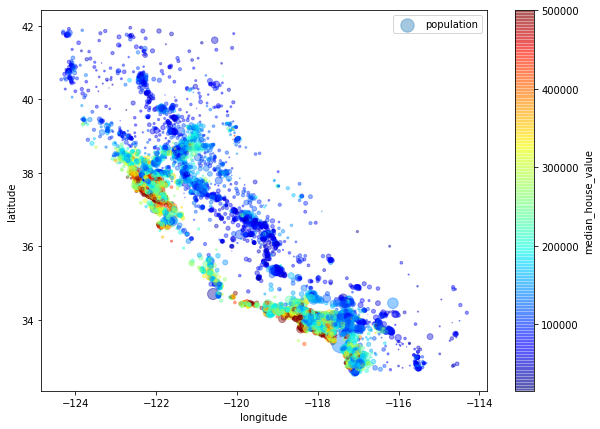

In [76]:
#s=circle, polulation, c=color, median_house_value, color map stype='jet'ㅠ
housing.plot(kind = 'scatter', x= 'longitude', y='latitude', alpha=0.4, 
            s=housing['population']/100, label = 'population', figsize=(10,7), 
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar = True, sharex=False)
plt.legend()

## 상관관계 조사

* 상관관계는 비선형관계까지는 잡을 수 없다

In [86]:
corr_matrix = housing.corr()

In [87]:
corr_matrix['median_house_value'].sort_values(ascending=False)

KeyError: 'median_house_value'

여러 feature들간의 산점도 보기

In [88]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

KeyError: "['median_house_value'] not in index"

In [89]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

KeyError: 'median_house_value'

In [90]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [91]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False) #total room이 많을 수록 비싸다

KeyError: 'median_house_value'

## 머신러닝 알고리즘을 위한 데이터 준비

In [92]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

null value 처리, drop.na

In [93]:
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms',axis=1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [94]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [95]:
housing_num = housing.drop('ocean_proximity', axis =1)

In [96]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

imputer는 각 특성의 median을 계산해서 그 결과를 객체의 statistics_속성에 저장

In [97]:
imputer.statistics_

array([ -1.18510000e+02,   3.42600000e+01,   2.90000000e+01,
         2.11950000e+03,   4.35000000e+02,   1.16400000e+03,
         4.08000000e+02,   3.54090000e+00,   5.23228423e+00,
         2.03031374e-01,   2.81765270e+00])

In [98]:
housing_num.median().values

array([ -1.18510000e+02,   3.42600000e+01,   2.90000000e+01,
         2.11950000e+03,   4.35000000e+02,   1.16400000e+03,
         4.08000000e+02,   3.54090000e+00,   5.23228423e+00,
         2.03031374e-01,   2.81765270e+00])

In [99]:
X = imputer.transform(housing_num)

In [100]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=list(housing.index.values))

In [101]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Category 텍스트값에서 숫자값으로 변환, Pandas의 factorize() 메서드 이용. One-Hot Encoding

In [102]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [103]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [104]:
from sklearn.preprocessing import OneHotEncoder


In [105]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
#sparse matrix꼴

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [106]:
#numpy 배열로 바꿔주기 toarray()
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

이 작업을 한번에 하게 도와주는 Categorical Encoder

In [107]:
# [PR #9151](https://github.com/scikit-learn/scikit-learn/pull/9151)에서 가져온 CategoricalEncoder 클래스의 정의.
# 이 클래스는 사이킷런 0.20에 포함될 예정입니다.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [108]:
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)

In [109]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [110]:
cat_encoer = CategoricalEncoder(encoding='onehout-dense')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [111]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

* 만약 카테고리 수가 많다면 embedding을 이용할 것

## 특성 스케일링

fit() => train data  
transform() => train set / test set

### 변환 단계를 정확한 순서대로 실행하는 scikit learn의 Pipeline클래스

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [114]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15491639],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83541914],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.42145718],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.5213097 ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30322057],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10147312]])

In [115]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [116]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [117]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [118]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Model Selection

In [119]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("predict:", lin_reg.predict(some_data_prepared))

predict: [ 209420.66391791  315409.89310276  210124.81126705   55983.96516399
  183463.75424898]


In [121]:
print("label:", list(some_labels))

label: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [122]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44548984,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452,  0.19380531,
        -0.08649871, -0.31205452, -0.08649871,  0.15491639,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.03698614,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.94074539,
        -0.03353391,  0.21768338, -0.03353391, -0.83541914,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15339291,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516,  0.49916044,
        -0.09240499, -0.46531516, -0.09240499,  0.42145718,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39680702,
         0.03604096, -0.38343559, -1.04556555, -0.07966124, -0.20867455,
         0.089

In [123]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68147.979684647362

In [124]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49072.519071647592

In [128]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [129]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Model Tuning

In [130]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [131]:
def display_scores(scores):
    print("score:", scores)
    print("avg:", scores.mean())
    print("std:", scores.std())

display_scores(tree_rmse_scores)

score: [ 70268.56914095  67321.37510246  70250.16170302  69350.38970554
  68496.68268781  73221.18348211  70991.80605357  70670.25089386
  74978.12398048  71248.65397128]
avg: 70679.7196721
std: 2086.17600866


In [132]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

score: [ 66062.46039988  66793.81281196  67645.09284559  74702.89452308
  68054.75936059  70902.33990311  64171.47694515  68081.54192467
  71042.58307017  67281.05019177]
avg: 68473.8011976
std: 2844.00842993


In [133]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [134]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22038.456963372806

In [135]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

score: [ 51972.22532335  48770.85745511  53737.40382182  55120.50553848
  51333.10752063  56612.47799172  52188.06693076  49799.95417507
  54963.5194759   53211.44394512]
avg: 52770.9562178
std: 2325.63622881


In [136]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68473.801198
std       2997.848108
min      64171.476945
25%      66915.622157
50%      67849.926103
75%      70197.140409
max      74702.894523
dtype: float64

In [137]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110567.12736719327

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [139]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [140]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [141]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66424.1072383 {'max_features': 2, 'n_estimators': 3}
57158.050008 {'max_features': 2, 'n_estimators': 10}
54520.6752627 {'max_features': 2, 'n_estimators': 30}
62142.244552 {'max_features': 4, 'n_estimators': 3}
54327.4130932 {'max_features': 4, 'n_estimators': 10}
52150.2991722 {'max_features': 4, 'n_estimators': 30}
61984.8352379 {'max_features': 6, 'n_estimators': 3}
53771.1310344 {'max_features': 6, 'n_estimators': 10}
51453.7299725 {'max_features': 6, 'n_estimators': 30}
60247.0472369 {'max_features': 8, 'n_estimators': 3}
53108.3349456 {'max_features': 8, 'n_estimators': 10}
50927.5844097 {'max_features': 8, 'n_estimators': 30}
64343.8349065 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56409.2751 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61760.4914502 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53583.8046162 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59777.1864358 {'bootstrap': False, 'max_features': 4, 'n_estimators

In [142]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.108216,0.005910,-4.412162e+09,-1.206755e+09,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-3.963709e+09,...,-4.356005e+09,-1.174277e+09,-4.487919e+09,-1.257670e+09,-4.579432e+09,-1.246134e+09,0.010306,0.001553,2.475811e+08,3.708941e+07
1,0.321405,0.017746,-3.267043e+09,-6.248003e+08,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-3.000224e+09,...,-3.367345e+09,-5.999633e+08,-3.148296e+09,-6.479880e+08,-3.423036e+09,-6.420536e+08,0.024977,0.002881,1.651781e+08,1.920552e+07
2,1.065135,0.047313,-2.972504e+09,-4.602195e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",9,-2.798720e+09,...,-3.080722e+09,-4.519975e+08,-2.774694e+09,-4.695116e+08,-3.135321e+09,-4.679459e+08,0.093445,0.005922,1.534047e+08,1.216281e+07
3,0.191072,0.006413,-3.861659e+09,-1.032868e+09,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",16,-3.644957e+09,...,-4.027148e+09,-1.009104e+09,-3.655269e+09,-1.054180e+09,-4.059043e+09,-1.061404e+09,0.052244,0.003029,1.786235e+08,2.093835e+07
4,0.611921,0.016533,-2.951468e+09,-5.523870e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",8,-2.687382e+09,...,-3.122705e+09,-5.268750e+08,-2.813835e+09,-5.791071e+08,-3.133591e+09,-5.559417e+08,0.046628,0.006343,1.752275e+08,1.707373e+07
5,1.567498,0.036755,-2.719654e+09,-4.167600e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-2.516730e+09,...,-2.880825e+09,-4.118031e+08,-2.568593e+09,-4.253448e+08,-2.835487e+09,-4.165328e+08,0.034032,0.008119,1.478675e+08,4.854727e+06
6,0.220580,0.004336,-3.842120e+09,-9.773068e+08,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",15,-3.851854e+09,...,-3.985252e+09,-9.849477e+08,-3.752611e+09,-1.009526e+09,-3.801201e+09,-9.546690e+08,0.018712,0.000402,7.844418e+07,2.236016e+07
7,0.755075,0.012779,-2.891335e+09,-5.306822e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",7,-2.902099e+09,...,-3.063913e+09,-5.404651e+08,-2.711400e+09,-5.363130e+08,-2.912058e+09,-5.166296e+08,0.072388,0.000706,1.124984e+08,1.094159e+07
8,2.341451,0.065070,-2.647486e+09,-4.043785e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",2,-2.523576e+09,...,-2.792948e+09,-4.070109e+08,-2.446187e+09,-4.109799e+08,-2.749880e+09,-4.027682e+08,0.083765,0.059516,1.367479e+08,4.284710e+06
9,0.359915,0.004968,-3.629707e+09,-9.492859e+08,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-3.467900e+09,...,-3.726994e+09,-9.318126e+08,-3.466279e+09,-9.381263e+08,-3.856690e+09,-9.751176e+08,0.045446,0.000741,1.509115e+08,1.855111e+07


In [143]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a193b4b70>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a18b5aac8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [144]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50159.1898632 {'max_features': 7, 'n_estimators': 180}
52575.3873906 {'max_features': 5, 'n_estimators': 15}
52129.655042 {'max_features': 3, 'n_estimators': 72}
51991.7930719 {'max_features': 5, 'n_estimators': 21}
50182.8805638 {'max_features': 7, 'n_estimators': 122}
52063.159173 {'max_features': 3, 'n_estimators': 75}
52034.8929626 {'max_features': 3, 'n_estimators': 88}
50705.2075369 {'max_features': 5, 'n_estimators': 100}
51762.6983816 {'max_features': 3, 'n_estimators': 150}
65535.3723659 {'max_features': 5, 'n_estimators': 2}


In [145]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  6.27393828e-02,   5.59419675e-02,   3.90166151e-02,
         1.34841573e-02,   1.34938203e-02,   1.32924697e-02,
         1.24840690e-02,   3.14171701e-01,   3.23194059e-02,
         4.31319896e-02,   7.02724134e-02,   3.86272244e-02,
         5.86824128e-02,   4.90112562e-02,   5.52296464e-03,
         1.72603205e-01,   4.89104472e-05,   2.06767166e-03,
         3.08836375e-03])

In [146]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31417170088226076, 'median_income'),
 (0.17260320464757747, 'INLAND'),
 (0.070272413384053128, 'population_per_household'),
 (0.062739382784685729, 'longitude'),
 (0.058682412756686467, 'pop_per_hhold'),
 (0.055941967482066507, 'latitude'),
 (0.049011256192332792, 'bedrooms_per_room'),
 (0.043131989620300751, 'bedrooms_per_room'),
 (0.039016615054006026, 'housing_median_age'),
 (0.03862722444072985, 'rooms_per_hhold'),
 (0.032319405946719941, 'rooms_per_household'),
 (0.013493820320180734, 'total_bedrooms'),
 (0.013484157349688634, 'total_rooms'),
 (0.013292469688178921, 'population'),
 (0.012484068963463397, 'households'),
 (0.0055229646380102896, '<1H OCEAN'),
 (0.0030883637450522705, 'NEAR OCEAN'),
 (0.002067671656818123, 'NEAR BAY'),
 (4.891044718811851e-05, 'ISLAND')]

In [147]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [148]:
final_rmse

48989.878382686074

In [150]:
from  scipy  import  stats

In [151]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([ 47002.40615293,  50899.80534084])

In [152]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(47003.001354641652, 50899.255707291828)

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [ ]:
expon()

In [ ]:
reciprocal()